# Gas Cloud
In this activity you will create your own word clouds using a subset of the Reuters corpus. 

In [1]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package reuters to /Users/ddevii/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ddevii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ddevii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ddevii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Get reuters stories where categories='gas'
ids = reuters.fileids(categories="gas")
corpus = [reuters.raw(i) for i in ids]

In [11]:
# Generate function to preprocess corpus for wordcloud creation
def process_text(doc):
    sw = set(stopwords.words("english"))
    regex = re.compile("[^a-zA-Z]")
    reclean= regex.sub(" ",doc)
    words = word_tokenize(reclean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return " ".join(output)


In [12]:
# Create wordcloud
big_string = " ".join(corpus)
input_words = process_text(big_string)

## Challenge

In [15]:
from nltk.util import ngrams

In [26]:
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [29]:
# Create bigram wordcloud
input_bigrams = process_text_bg(big_string)

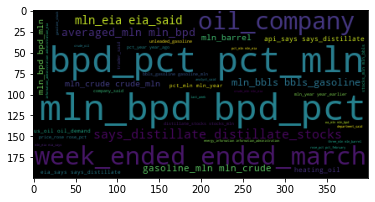

In [31]:
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)
